# 04 - Modèles Causaux Graphiques

## Réflexion sur la Causalité

Avez-vous déjà remarqué à quel point ces cuisiniers dans les vidéos YouTube sont excellents pour décrire la nourriture ? "Réduisez la sauce jusqu'à ce qu'elle atteigne une consistance veloutée". Si vous apprenez juste à cuisiner, vous n'avez aucune idée de ce que cela signifie. Donnez-moi juste le temps que je dois laisser cette chose sur le feu ! Avec la causalité, c'est la même chose. Supposons que vous entrez dans un bar et entendez des gens discuter de causalité (probablement un bar à côté d'un département d'économie). Dans ce cas, vous les entendrez dire comment la confusion des revenus a rendu difficile l'identification de l'effet de l'immigration sur ce quartier, donc ils ont dû utiliser une variable instrumentale. Et à ce stade, vous pourriez ne pas comprendre de quoi ils parlent. Mais je vais résoudre au moins une partie de ce problème dès maintenant.

Les modèles graphiques sont le langage de la causalité. Ils ne sont pas seulement ce que vous utilisez pour parler avec d'autres passionnés de causalité courageux et vrais, mais aussi quelque chose que vous utilisez pour rendre vos propres pensées plus transparentes.

Comme point de départ, prenons par exemple l'indépendance conditionnelle des résultats potentiels. C'est l'une des principales hypothèses que nous devons considérer comme vraies lors de l'inférence causale :

\[
(Y_0, Y_1) \perp T | X
\]

L'indépendance conditionnelle nous permet de mesurer un effet sur le résultat uniquement dû au traitement et non à toute autre variable cachée. L'exemple classique de ceci est l'effet d'un médicament sur un patient malade. Si seuls les patients très malades reçoivent le médicament, il pourrait même sembler que donner le médicament diminue la santé des patients. Cela est dû au fait que l'effet de la gravité est mélangé avec l'effet du médicament. Si nous divisons les patients en cas graves et non graves et analysons l'impact du médicament dans chaque sous-groupe, nous obtiendrons une image plus claire de l'effet réel. Cette division de la population par ses caractéristiques est ce que nous appelons le contrôle ou la conditionnalité sur X. En conditionnant sur les cas graves, le mécanisme de traitement devient aussi bon que le hasard. Les patients dans le groupe des cas graves peuvent ou non recevoir le médicament uniquement par chance, et non plus en raison d'une grande gravité, puisque tous les patients sont les mêmes sur cette dimension. Et si le traitement est attribué de manière aléatoire au sein des groupes, le traitement devient conditionnellement indépendant des résultats potentiels.

L'indépendance et l'indépendance conditionnelle sont essentielles à l'inférence causale. Pourtant, il peut être assez difficile de les comprendre. Mais cela peut changer si nous utilisons le bon langage pour décrire ce problème. C'est là que les **modèles graphiques causaux** entrent en jeu. Un modèle graphique causal est un moyen de représenter comment fonctionne la causalité en termes de ce qui cause quoi.

Un modèle graphique ressemble à ceci :

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

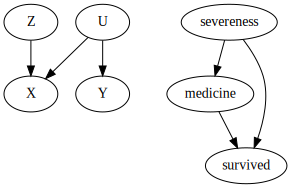

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

Chaque nœud est une variable aléatoire. Nous utilisons des flèches, ou arêtes, pour montrer si une variable en cause une autre. Dans le premier modèle graphique ci-dessus, nous disons que Z cause X et que U cause X et Y. Pour donner un exemple plus concret, nous pouvons traduire nos réflexions sur l'impact du médicament sur la survie des patients dans le deuxième graphique ci-dessus. La gravité cause à la fois le médicament et la survie, et le médicament cause également la survie. Comme nous le verrons, ce langage des modèles graphiques causaux nous aidera à clarifier notre réflexion sur la causalité, car il clarifie nos croyances sur le fonctionnement du monde.

## Cours Intensif sur les Modèles Graphiques

Il existe [des cours entiers sur les modèles graphiques](https://www.coursera.org/specializations/probabilistic-graphical-models). Mais, pour notre objectif, il est simplement (très) important de comprendre quelles sortes d'hypothèses d'indépendance et d'indépendance conditionnelle un modèle graphique implique. Comme nous le verrons, l'indépendance circule à travers un modèle graphique comme l'eau coule dans un ruisseau. Nous pouvons arrêter ce flux ou le permettre, en fonction de la manière dont nous traitons les variables qui s'y trouvent. Pour comprendre cela, examinons quelques structures graphiques courantes et exemples. Ils seront assez simples, mais ils constituent des blocs de construction suffisants pour comprendre tout sur l'indépendance et l'indépendance conditionnelle dans les modèles graphiques.

Tout d'abord, regardez ce graphique très simple. A cause B, B cause C. Ou X cause Y qui cause Z.

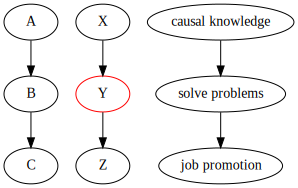

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

Dans le premier graphique, la dépendance circule dans le sens des flèches. Remarquez que la dépendance est symétrique, bien que cela soit un peu moins intuitif. Pour donner un exemple plus concret, disons que la connaissance de l'inférence causale est le seul moyen de résoudre des problèmes commerciaux, et résoudre ces problèmes est le seul moyen d'obtenir une promotion. Ainsi, la connaissance causale implique la résolution de problèmes qui entraîne une promotion. Nous pouvons dire ici que la promotion dépend de la connaissance causale. Plus votre expertise causale est grande, plus vos chances d'obtenir une promotion sont élevées. De plus, plus vos chances de promotion sont élevées, plus vos chances de posséder des connaissances causales sont grandes. Sinon, il serait difficile d'obtenir une promotion.

Maintenant, disons que je conditionne sur la variable intermédiaire. Dans ce cas, la dépendance est bloquée. Donc, X et Z sont indépendants étant donné Y. Dans le graphique ci-dessus, le rouge indique que Y est une variable conditionnée. De la même manière, dans notre exemple, si je sais que vous êtes bon pour résoudre des problèmes, savoir que vous connaissez l'inférence causale ne donne aucune information supplémentaire sur vos chances d'obtenir une promotion. En termes mathématiques, $E[Promotion|Résoudre \ des \ problèmes, Connaissance \ causale]=E[Promotion|Résoudre \ des \ problèmes]$. L'inverse est également vrai ; une fois que je sais à quel point vous êtes bon pour résoudre des problèmes, connaître votre statut de promotion ne me donne aucune information supplémentaire sur la probabilité que vous connaissiez l'inférence causale.

En règle générale, le flux de dépendance dans le chemin direct de A à C est bloqué lorsque nous conditionnons sur une variable intermédiaire B. Ou,

$A \not \perp C$

et

$A \perp C | B$

Maintenant, considérons une structure en fourche. La même variable cause deux autres variables dans le graphique. Dans ce cas, la dépendance circule en arrière à travers les flèches, et nous avons un **chemin de contournement** (*backdoor path* en anglais). Nous pouvons fermer le chemin de contournement et arrêter la dépendance en conditionnant sur la cause commune.

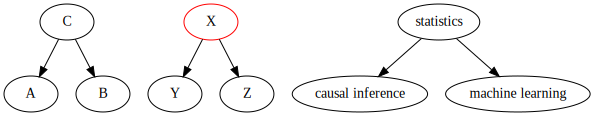

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

Par exemple, disons que votre connaissance des statistiques vous permet de mieux comprendre l'inférence causale et le machine learning. Si je ne connais pas votre niveau de connaissance statistique, alors savoir que vous êtes bon en inférence causale rend plus probable que vous soyez également bon en machine learning. En effet, même si je ne connais pas votre niveau de connaissance statistique, je peux l'inférer à partir de vos connaissances en inférence causale. Si vous êtes bon en inférence causale, vous êtes probablement bon en statistiques, ce qui rend plus probable que vous soyez bon en machine learning.

Maintenant, si je conditionne sur vos connaissances en statistiques, alors votre niveau de connaissance en machine learning devient indépendant de votre niveau de connaissance en inférence causale. Connaître votre niveau de statistique me donne déjà toutes les informations nécessaires pour inférer votre niveau de compétence en machine learning. Vous voyez, connaître votre niveau d'inférence causale ne fournira aucune information supplémentaire dans ce cas.

En règle générale, deux variables qui partagent une cause commune sont dépendantes, mais indépendantes lorsque nous conditionnons sur la cause commune. Ou

$A \not \perp B$

et

$A \perp B | C$

La seule structure manquante est le collidant. Un "collidant" c'est quand deux flèches se rejoignent sur une seule variable. Nous pouvons dire que dans ce cas, les deux variables partagent un effet commun.

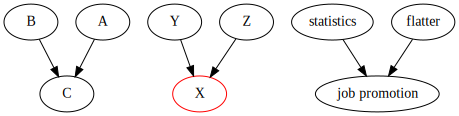

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

Par exemple, considérons qu'il y a deux façons d'obtenir une promotion. Vous pouvez soit être bon en statistiques, soit flatter votre patron. Si je ne conditionne pas sur votre promotion, c'est-à-dire que je ne sais pas si vous l'obtiendrez ou non, alors votre niveau en statistiques et votre capacité à flatter sont indépendants. En d'autres termes, savoir à quel point vous êtes bon en statistiques ne me dit rien sur votre capacité à flatter votre patron. En revanche, si vous obtenez une promotion, soudainement, connaître votre niveau en statistiques m'informe sur votre capacité à flatter. Si vous êtes mauvais en statistiques et que vous avez obtenu une promotion, il est probable que vous sachiez comment flatter. Sinon, vous n'obtiendriez pas de promotion. Inversement, si vous êtes mauvais pour flatter, il doit être vrai que vous êtes bon en statistiques. Ce phénomène est parfois appelé **explaining away**, car une cause explique déjà l'effet, rendant l'autre cause moins probable.

En règle générale, conditionner sur un collidant ouvre le chemin de dépendance. Ne pas conditionner le laisse fermé. Ou

$A \perp B$

et

$A \not \perp B | C$

En connaissant les trois structures, nous pouvons en tirer une règle encore plus générale. Un chemin est bloqué si et seulement si :
1. Il contient un non-collidant qui a été conditionné
2. Il contient un collidant qui n'a pas été conditionné et n'a pas de descendants qui ont été conditionnés.

Voici une fiche mémo sur la façon dont la dépendance circule dans un graphe. Je l'ai prise d'une [présentation de Stanford](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf) par Mark Paskin. Les flèches avec des lignes à leurs extrémités signifient l'indépendance, et les flèches sans lignes à leurs extrémités signifient la dépendance.

![img](data/img/graph-flow.png)

Comme dernier exemple, essayez de déterminer certaines relations d'indépendance et de dépendance dans le graphe causal suivant.
1. Est-ce que $D \perp C$?
2. Est-ce que $D \perp C| A $ ?
3. Est-ce que $D \perp C| G $ ?
4. Est-ce que $A \perp F $ ?
5. Est-ce que $A \perp F|E $ ?
6. Est-ce que $A \perp F|E,C $ ?

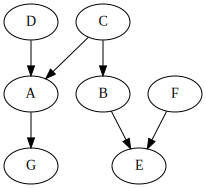

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Réponses** :
1. $D \perp C$. Il contient un collidant qui n'a **pas** été conditionné.
2. $D \not\perp C| A $. Il contient un collidant qui a été conditionné.
3. $D \not\perp C| G $. Il contient le descendant d'un collidant qui a été conditionné. Vous pouvez voir G comme une sorte de proxy pour A ici.
4. $A \perp F $. Il contient un collidant, B->E<-F, qui n'a **pas** été conditionné.
5. $A \not\perp F|E $. Il contient un collidant, B->E<-F, qui a été conditionné.
6. $A \perp F|E, C $. Il contient un collidant, B->E<-F, qui a été conditionné, mais il contient un non-collidant qui a été conditionné. Conditionner sur E ouvre le chemin, mais conditionner sur C le ferme à nouveau.

Connaître les modèles graphiques causaux nous permet de comprendre les problèmes qui surviennent dans l'inférence causale. Comme nous l'avons vu, le problème se résume toujours au biais.

$$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$$

Les modèles graphiques nous permettent de diagnostiquer quel biais nous rencontrons et quels outils nous devons utiliser pour les corriger.

## Biais de Confusion

![img](./data/img/causal-graph/both_crap.png)

La première cause significative de biais est la confusion. Cela se produit lorsque le traitement et le résultat partagent une cause commune. Par exemple, disons que le traitement est l'éducation et le résultat est le revenu. Il est difficile de connaître l'effet causal de l'éducation sur les salaires car les deux partagent une cause commune : l'intelligence. On pourrait donc argumenter que les personnes plus éduquées gagnent plus d'argent simplement parce qu'elles sont plus intelligentes, et non parce qu'elles ont plus d'éducation. Nous devons fermer tous les chemins de contournement entre le traitement et le résultat pour identifier l'effet causal. Si nous le faisons, le seul effet qui restera sera l'effet direct T->Y. Dans notre exemple, si nous contrôlons pour l'intelligence, c'est-à-dire que nous comparons des personnes avec le même niveau d'intelligence mais des niveaux d'éducation différents, la différence dans le résultat sera uniquement due à la différence de scolarité puisque l'intelligence sera la même pour tout le monde. Pour corriger le biais de confusion, nous devons contrôler toutes les causes communes du traitement et du résultat.

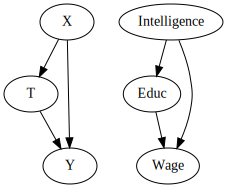

In [7]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

Malheureusement, il n'est pas toujours possible de contrôler toutes les causes communes. Parfois, il y a des causes inconnues ou des causes connues que nous ne pouvons pas mesurer. Le cas de l'intelligence est l'un de ces derniers. Malgré tous les efforts, les scientifiques n'ont pas encore trouvé comment mesurer correctement l'intelligence. J'utiliserai U pour désigner les variables non mesurées ici. Maintenant, supposons un instant que l'intelligence ne peut pas affecter directement votre éducation. Elle influence votre performance aux SAT, mais ce sont les SAT qui déterminent votre niveau de scolarité puisqu'ils ouvrent la possibilité d'un bon collège. Même si nous ne pouvons pas contrôler l'intelligence non mesurable, nous pouvons contrôler les SAT et fermer ce chemin de contournement.

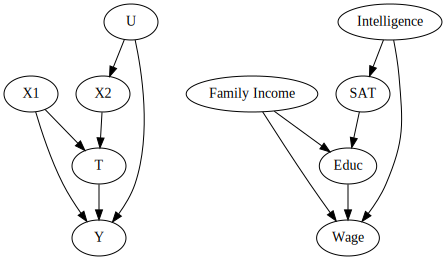

In [8]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

Dans le graphique suivant, conditionner sur X1 et X2, c'est-à-dire les SAT et le revenu familial, est suffisant pour fermer tous les chemins de contournement entre le traitement et le résultat. En d'autres termes, $(Y_0, Y_1) \perp T | X1, X2$. Ainsi, même si nous ne pouvons pas mesurer toutes les causes communes, nous pouvons toujours atteindre l'indépendance conditionnelle si nous contrôlons les variables mesurables qui médiatisent l'effet de l'inmesuré sur le traitement. Une petite note, nous avons également $(Y_0, Y_1) \perp T | X1, U$, mais comme nous ne pouvons pas observer U, nous ne pouvons pas conditionner dessus.

Mais que se passe-t-il si ce n'est pas le cas ? Et si la variable non mesurée causait directement le traitement et le résultat ? Dans l'exemple suivant, l'intelligence cause maintenant l'éducation et le revenu. Il y a donc une confusion dans la relation entre le traitement (l'éducation) et le résultat (le salaire). Dans ce cas, nous ne pouvons pas contrôler le facteur de confusion car il est non mesurable. Cependant, nous avons d'autres variables mesurées qui peuvent agir comme un proxy pour le facteur de confusion. Ces variables ne sont pas dans le chemin de contournement, mais les contrôler aidera à réduire le biais (mais ne l'éliminera pas). Ces variables sont parfois appelées confondeurs substituts.

Dans notre exemple, nous ne pouvons pas mesurer l'intelligence, mais nous pouvons mesurer certaines de ses causes, comme l'éducation du père et de la mère, et certains de ses effets, comme le score de QI ou les SAT. Contrôler ces variables substituts n'est pas suffisant pour éliminer le biais, mais cela aide.

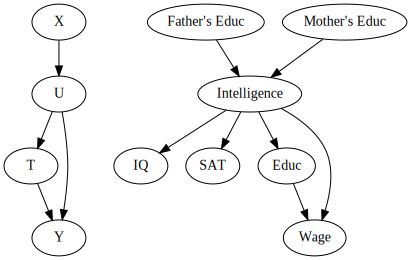

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Biais de Sélection

Vous pourriez penser qu'il est bon d'ajouter tout ce que vous pouvez mesurer à votre modèle pour vous assurer de ne pas avoir de biais de confusion. Eh bien, réfléchissez-y à deux fois.

![image.png](./data/img/causal-graph/selection_bias.png)

La deuxième source importante de biais est ce que nous appellerons le biais de sélection. Ici, je pense que la distinction entre celui-ci et le biais de confusion est constructive, donc je vais m'y tenir. Si le biais de confusion se produit lorsque nous ne contrôlons pas une cause commune, le biais de sélection est plus lié aux effets. Une mise en garde ici, les économistes ont tendance à se référer à toutes sortes de biais comme biais de sélection.

Souvent, le biais de sélection survient lorsque nous contrôlons plus de variables que nous ne devrions. Il se peut que le traitement et le résultat potentiel soient indépendants de manière marginale mais deviennent dépendants une fois que nous conditionnons sur un collidant.

Imaginez qu'avec l'aide de quelque miracle, vous puissiez enfin randomiser l'éducation pour mesurer son effet sur les salaires. Mais juste pour être sûr de ne pas avoir de confusion, vous contrôlez de nombreuses variables. Parmi elles, vous contrôlez les investissements. Mais l'investissement n'est pas une cause commune de l'éducation et du salaire. Au contraire, c'est une conséquence des deux. Les personnes plus éduquées gagnent plus et investissent plus. De plus, ceux qui gagnent plus investissent plus. Puisque l'investissement est un collidant, en conditionnant dessus, vous ouvrez un deuxième chemin entre le traitement et le résultat, ce qui rendra plus difficile la mesure de l'effet direct. Une façon de penser à cela est qu'en contrôlant les investissements, vous examinez de petits groupes de la population où l'investissement est le même et ensuite trouvez l'effet de l'éducation sur ces groupes. Mais en faisant cela, vous empêchez également indirectement et involontairement les salaires de changer beaucoup. En conséquence, vous ne pourrez pas voir comment l'éducation modifie les salaires parce que vous n'autorisez pas les salaires à changer comme ils le devraient.

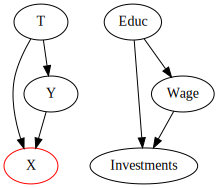

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Imaginez que les investissements et l'éducation prennent seulement deux valeurs pour démontrer pourquoi c'est le cas. Que les gens investissent ou non. Ils sont soit éduqués, soit non éduqués. Initialement, lorsque nous ne contrôlons pas les investissements, le terme de biais est nul : $E[Y_0|T=1] - E[Y_0|T=0] = 0$ parce que l'éducation a été randomisée. Cela signifie que le salaire des personnes si elles n'avaient pas reçu d'éducation $Wage_0$ est le même qu'elles reçoivent ou non le traitement éducatif. Mais que se passe-t-il si nous conditionnons les investissements ?

En regardant ceux qui investissent, nous avons probablement le cas où $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. En d'autres termes, parmi ceux qui investissent, ceux qui parviennent à le faire même sans éducation sont plus susceptibles de réaliser des gains élevés, quel que soit leur niveau d'éducation. Pour cette raison, le salaire de ces personnes, $Wage_0|T=0$, est probablement plus élevé que le salaire du groupe éduqué s'ils n'avaient pas reçu d'éducation, $Wage_0|T=1$. Un raisonnement similaire peut être appliqué à ceux qui n'investissent pas, où nous avons probablement aussi $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Ceux qui n'investissent pas même avec une éducation auraient probablement un salaire plus bas s'ils n'avaient pas reçu d'éducation que ceux qui n'investissent pas mais n'ont pas reçu d'éducation.

Pour utiliser un argument purement graphique, si quelqu'un investit, savoir qu'ils ont un haut niveau d'éducation explique la deuxième cause, qui est le salaire. Conditionné à l'investissement, un niveau d'éducation plus élevé est associé à des salaires plus bas et nous avons un biais négatif $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$.

En passant, tout ce dont nous avons discuté est vrai si nous conditionnons sur n'importe quel descendant d'un effet commun.

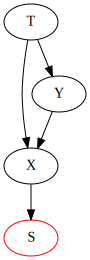

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

Il se produit une chose similaire lorsque nous conditionnons sur un médiateur du traitement. Un médiateur est une variable entre le traitement et le résultat. Il, en quelque sorte, médiatise l'effet causal. Par exemple, supposons encore une fois que vous puissiez randomiser l'éducation. Mais, juste pour être sûr, vous décidez de contrôler si la personne avait un emploi de bureau. Encore une fois, ce conditionnement biaise l'estimation de l'effet causal. Cette fois-ci, non pas parce qu'il ouvre un chemin de porte avant avec un collidant, mais parce qu'il ferme l'un des canaux par lesquels le traitement opère. Dans notre exemple, obtenir un emploi de bureau est une des façons dont une meilleure éducation mène à un salaire plus élevé. En le contrôlant, nous fermons ce canal et ne laissons ouvert que l'effet direct de l'éducation sur les salaires.

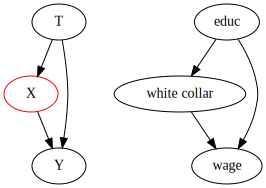

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

Pour donner un argument basé sur les résultats potentiels, nous savons que, grâce à la randomisation, le biais est nul $E[Y_0|T=0] - E[Y_0|T=1] = 0$. Cependant, si nous conditionnons sur les individus ayant un emploi de bureau, nous avons $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$. Cela est dû au fait que ceux qui parviennent à obtenir un emploi de bureau sans éducation sont probablement plus travailleurs que ceux qui ont besoin de l'aide de l'éducation pour obtenir le même emploi. Avec le même raisonnement, $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ parce que ceux qui n'ont pas obtenu un emploi de bureau même avec une éducation sont probablement moins travailleurs que ceux qui n'en ont pas obtenu, mais qui n'ont également pas reçu d'éducation.

Dans notre cas, conditionner sur le médiateur induit un biais négatif. Cela fait paraître l'effet de l'éducation plus faible qu'il ne l'est réellement. C'est le cas parce que l'effet causal est positif. Si l'effet était négatif, conditionner sur un médiateur induirait un biais positif. Dans tous les cas, ce type de conditionnement rend l'effet plus faible qu'il ne l'est.

Pour le dire de manière plus prosaïque, supposons que vous deviez choisir entre deux candidats pour un emploi dans votre entreprise. Les deux ont des réalisations professionnelles tout aussi impressionnantes, mais l'un n'a pas de diplôme d'enseignement supérieur. Lequel devriez-vous choisir ? Bien sûr, vous devriez choisir celui sans diplôme d'enseignement supérieur, car il a réussi à accomplir les mêmes choses que l'autre malgré des chances défavorables.

![image.png](./data/img/causal-graph/three_bias.png)

## Idées Clés

Nous avons étudié les modèles graphiques comme un langage pour mieux comprendre et exprimer les idées de causalité. Nous avons fait un résumé rapide des règles de l'indépendance conditionnelle dans un graphe. Cela nous a ensuite aidés à explorer trois structures qui peuvent mener à des biais.

La première était la confusion, qui se produit lorsque le traitement et le résultat ont une cause commune que nous ne prenons pas en compte ou que nous ne contrôlons pas. Le deuxième est le biais de sélection dû au conditionnement sur un effet commun. La troisième structure est également une forme de biais de sélection, cette fois due à un contrôle excessif des variables médiatrices. Ce contrôle excessif pourrait mener à des biais même si le traitement était attribué de manière aléatoire. Le biais de sélection peut souvent être corrigé en ne faisant simplement rien, ce qui le rend dangereux. Comme nous sommes biaisés en faveur de l'action, nous avons tendance à considérer les idées qui contrôlent les choses comme astucieuses alors qu'elles peuvent faire plus de mal que de bien.

## Références

J'aime penser à ce livre entier comme un hommage à Joshua Angrist, Alberto Abadie et Christopher Walters pour leur incroyable cours d'économétrie. La plupart des idées ici sont tirées de leurs cours à l'American Economic Association. Les regarder est ce qui me maintient sain d'esprit pendant cette année difficile de 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Je tiens également à référencer les livres incroyables d'Angrist. Ils m'ont montré que l'économétrie, ou 'Metrics' comme ils l'appellent, n'est pas seulement extrêmement utile mais aussi profondément amusante.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Ma dernière référence est le livre de Miguel Hernan et Jamie Robins. Il a été mon compagnon fidèle dans les questions causales les plus épineuses que j'ai dû résoudre.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

Les données utilisées ici proviennent d'une étude de Alpert, William T., Kenneth A. Couch, et Oskar R. Harmon. 2016. ["A Randomized Assessment of Online Learning"](https://www.aeaweb.org/articles?id=10.1257/aer.p20161057). American Economic Review, 106 (5): 378-82.

![img](./data/img/poetry.png)

## Contribuer

*L'Inférence Causale pour les Courageux et les Vrais* est un matériel open-source sur l'inférence causale, la statistique de la science. Son objectif est d'être accessible monétairement et intellectuellement. Il utilise uniquement des logiciels gratuits basés sur Python.
Si vous avez trouvé ce livre précieux et souhaitez le soutenir, veuillez vous rendre sur [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). Si vous n'êtes pas prêt à contribuer financièrement, vous pouvez également aider en corrigeant les fautes de frappe, en suggérant des modifications ou en donnant votre avis sur les passages que vous n'avez pas compris. Rendez-vous sur le repo du livre et [ouvrez une issue](https://github.com/matheusfacure/python-causality-handbook/issues). Enfin, si vous avez aimé ce contenu, veuillez le partager avec d'autres personnes qui pourraient le trouver utile et lui donner une [étoile sur GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).